# 17 -Ingeniería de características (Selección automática de características)

![](images/1.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
from imports import *

Agregar más características aumenta la complejidad de los algoritmos, y también aumenta la posibilidad del sobreajuste. 

Cuando agregamos nuevas características, no todas serán relevantes para la predicción, por lo tanto es una buena idea reducir el número de variables a las más importantes, y descartar el resto. Comúnmente esto nos lleva a modelos más simples y generalizables.

## Estadísticas univariadas

- Validar si existe una relación estadísticamente significante entre cada característica y el target.
- Se escogen las variables que den más confianza de relación. 
- Esto se llama Analysis of Variance (ANOVA).
- Se va haciendo variable por variable individualmente.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [4]:
len(cancer.feature_names)

30

In [5]:
# Agregar ruido a los datos para hacer más compleja la información
# Configurar mi semilla
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# Agegar el ruido, las primeras 30 features son las originales
# Las siguientes 50 features son ruido
X_w_noise = np.hstack([cancer.data,noise])

In [6]:
# Método de la exclusión
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, 
                                                    cancer.target,
                                                    random_state=0)

In [7]:
# Usar f_classif y SelectPercentile para escoger el 10% de las variables
select = SelectPercentile(percentile=10)
select.fit(X_train,y_train)
# Transformar el dataset de entrenamiento
X_train_selected = select.transform(X_train)

In [8]:
X_train.shape

(426, 80)

In [9]:
X_train_selected.shape

(426, 8)

[ True False  True  True False False False  True False False False False
 False False False False False False False False  True False  True  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


([], [])

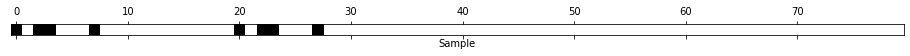

In [10]:
# Máscara para saber qué variables escogió
mask = select.get_support()
print(mask)

# Visualizar la máscara -- negro es verdad, blanco es falso
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

In [11]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Score con todos los datos: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("Score con datos seleccionados: {:.3f}".format(lr.score(X_test_selected,y_test)))


Score con todos los datos: 0.874
Score con datos seleccionados: 0.944


- Selección de características basadas en un modelo
- Selección de características iterativamente

## Selección basada en modelos

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [13]:
cancer = load_breast_cancer()

In [14]:
# Método de la exclusión
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    random_state=0)

In [15]:
select = SelectFromModel(RandomForestClassifier(random_state=42), 
                         threshold="median")

In [16]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [17]:
X_train_best = select.transform(X_train)

In [18]:
X_train.shape

(426, 30)

In [19]:
X_train_best.shape

(426, 15)

([], [])

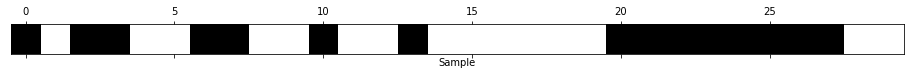

In [20]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

In [21]:
# Modelo para predecir
from sklearn.linear_model import LogisticRegression

In [22]:
X_test_best = select.transform(X_test)

In [23]:
clf = LogisticRegression().fit(X_train_best,y_train)

In [24]:
clf.score(X_test_best,y_test)

0.951048951048951

## Con ruido

In [34]:
# Método de la exclusión
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, 
                                                    cancer.target,
                                                    random_state=0)

In [35]:
select_noise = SelectFromModel(RandomForestClassifier(random_state=42), 
                         threshold="median")

In [36]:
select_noise.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

([], [])

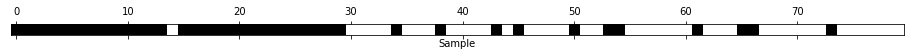

In [37]:
mask = select_noise.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

In [38]:
X_train_best = select_noise.transform(X_train)

In [39]:
X_test_best = select_noise.transform(X_test)

In [40]:
clf = LogisticRegression().fit(X_train_best,y_train)

In [41]:
clf.score(X_test_best,y_test)

0.9300699300699301

## Selección de características iterativamente

In [25]:
# Método de la exclusión
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    random_state=0)

In [26]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(random_state=42), 
             n_features_to_select=10)

In [27]:
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

([], [])

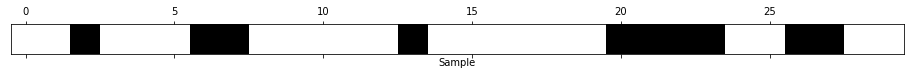

In [28]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

In [29]:
for i in range(X_train.shape[1]):
    print("Id: {}, Seleccionada: {}".format(i,select.support_[i]))

Id: 0, Seleccionada: False
Id: 1, Seleccionada: False
Id: 2, Seleccionada: True
Id: 3, Seleccionada: False
Id: 4, Seleccionada: False
Id: 5, Seleccionada: False
Id: 6, Seleccionada: True
Id: 7, Seleccionada: True
Id: 8, Seleccionada: False
Id: 9, Seleccionada: False
Id: 10, Seleccionada: False
Id: 11, Seleccionada: False
Id: 12, Seleccionada: False
Id: 13, Seleccionada: True
Id: 14, Seleccionada: False
Id: 15, Seleccionada: False
Id: 16, Seleccionada: False
Id: 17, Seleccionada: False
Id: 18, Seleccionada: False
Id: 19, Seleccionada: False
Id: 20, Seleccionada: True
Id: 21, Seleccionada: True
Id: 22, Seleccionada: True
Id: 23, Seleccionada: True
Id: 24, Seleccionada: False
Id: 25, Seleccionada: False
Id: 26, Seleccionada: True
Id: 27, Seleccionada: True
Id: 28, Seleccionada: False
Id: 29, Seleccionada: False


In [30]:
for idx,name in enumerate(cancer.feature_names):
    print(idx,name)

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


In [31]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [32]:
clf = LogisticRegression().fit(X_train_rfe,y_train)

In [33]:
clf.score(X_test_rfe,y_test)

0.958041958041958

Este es el método más usado